In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('customer_data.csv')

In [5]:
# Display the shape of the DataFrame
print('DataFrame Shape:')
#FILL THE CODE HERE
print(df.shape)

DataFrame Shape:
(2000, 15)


In [6]:
# Display the first 5 rows of the DataFrame
print('First 5 Rows of Data:')
#FILL THE CODE HERE
print(df.head())

First 5 Rows of Data:
   index      Date  Year     Month  Customer Age Customer Gender  \
0      0  02/19/16  2016  February            29               F   
1      1  02/20/16  2016  February            29               F   
2      2  02/27/16  2016  February            29               F   
3      3  03/12/16  2016     March            29               F   
4      4  03/12/16  2016     March            29               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes         1   
1  United States  Washington         Clothing           Gloves         2   
2  United States  Washington      Accessories  Tires and Tubes         3   
3  United States  Washington      Accessories  Tires and Tubes         2   
4  United States  Washington      Accessories  Tires and Tubes         3   

   Unit Cost  Unit Price  Cost  Revenue  
0      80.00  109.000000    80      109  
1      24.50   28.500000    

In [7]:
# Display columns and their types
print('Columns and Data Types:')
#FILL THE CODE HERE
print(df.dtypes)

Columns and Data Types:
index                 int64
Date                 object
Year                  int64
Month                object
Customer Age          int64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity              int64
Unit Cost           float64
Unit Price          float64
Cost                  int64
Revenue               int64
dtype: object


In [8]:
# Data Cleaning

# Drop the 'index' column
#FILL THE CODE HERE 
df.drop(columns=['index'],inplace=True)

In [9]:
# Cast 'Year' as type string and handle potential floating point issues
df['Year']=df['Year'].astype('string')

In [10]:
# Convert 'Date' from object to datetime
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\2108187441.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'],errors='coerce')


In [13]:
# Define age groups
age_groups = {
    (0, 18): "0-18",
    (19, 30): "19-30",
    (31, 40): "31-40",
    (41, 50): "41-50",
    (51, 60): "51-60",
    (61, 70): "61-70",
    (71, float("inf")): "71 & above"
}

# Create a new column for age groups based on 'Customer Age'
#FILL THE CODE HERE
if 'Customer Age' in df.columns:
    df['Age Group']=pd.cut(df['Customer Age'],bins=[0,18,30,40,50,60,70,float('inf')],
                          labels=['0-18','19-30','31-40','41-50','51-60','61-70','71 & above'])
print(df[['Customer Age','Age Group']].head(3))


   Customer Age Age Group
0            29     19-30
1            29     19-30
2            29     19-30


In [14]:
# Calculate profit margin. 
# Create a new column in the DF by name margin.
# Margin is computed as Revenue-Cost
#FILL THE CODE HERE
if 'Revenue' in df.columns and 'Cost' in df.columns:
    df['Margin']=df['Revenue']-df['Cost']
print(df.head(2))

        Date  Year     Month  Customer Age Customer Gender        Country  \
0 2016-02-19  2016  February            29               F  United States   
1 2016-02-20  2016  February            29               F  United States   

        State Product Category     Sub Category  Quantity  Unit Cost  \
0  Washington      Accessories  Tires and Tubes         1       80.0   
1  Washington         Clothing           Gloves         2       24.5   

   Unit Price  Cost  Revenue Age Group  Margin  
0       109.0    80      109     19-30      29  
1        28.5    49       57     19-30       8  


In [15]:
# Drop rows with null values
#FILL THE CODE HERE
df.dropna(inplace=True)

In [16]:
# Data Exploration

# Examine the distribution of numerical variables in a tabular form
#FILL THE CODE HERE
print('Distribution of Numerical Variable:')
print(df.describe())

Distribution of Numerical Variable:
                             Date  Customer Age     Quantity    Unit Cost  \
count                        2000   2000.000000  2000.000000  2000.000000   
mean   2016-01-01 23:49:55.200000     35.739500     1.998500   367.149905   
min           2015-01-09 00:00:00     17.000000     1.000000     0.670000   
25%           2015-10-03 12:00:00     28.000000     1.000000    44.000000   
50%           2015-12-29 00:00:00     34.000000     2.000000   163.330000   
75%           2016-04-13 00:00:00     43.000000     3.000000   455.000000   
max           2016-07-31 00:00:00     71.000000     3.000000  2443.000000   
std                           NaN     10.075684     0.809213   517.772561   

        Unit Price         Cost      Revenue       Margin  
count  2000.000000  2000.000000  2000.000000  2000.000000  
mean    395.876667   606.815500   656.233500    49.418000  
min       0.666667     2.000000     2.000000  -828.000000  
25%      52.500000    84.00000

In [17]:
# Demographic Analysis

# Age Distribution
# Define the order for age groups
age_order = ["0-18", "19-30", "31-40", "41-50", "51-60", "61-70", "71 & above"]

# Create a sorting column to maintain order
#FILL THE CODE HERE
df['Sorting']=pd.Categorical(df['Age Group'],categories=age_order,ordered=True)


# Sort the DataFrame based on the sorting column
#FILL THE CODE HERE
df.sort_values(by='Sorting',inplace=True)
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Age Group,Margin,Sorting
1185,2016-02-18,2016,February,18,M,France,Essonne,Accessories,Helmets,3,105.0,154.000000,315,462,0-18,147,0-18
47,2015-07-22,2015,July,18,F,United States,California,Accessories,Bike Stands,1,636.0,677.000000,636,677,0-18,41,0-18
48,2015-10-10,2015,October,18,F,United States,California,Accessories,Bike Stands,3,159.0,170.666667,477,512,0-18,35,0-18
49,2016-06-11,2016,June,18,M,United States,California,Bikes,Mountain Bikes,1,769.0,875.000000,769,875,0-18,106,0-18
50,2015-08-13,2015,August,18,M,United States,California,Bikes,Mountain Bikes,1,2295.0,2242.000000,2295,2242,0-18,-53,0-18


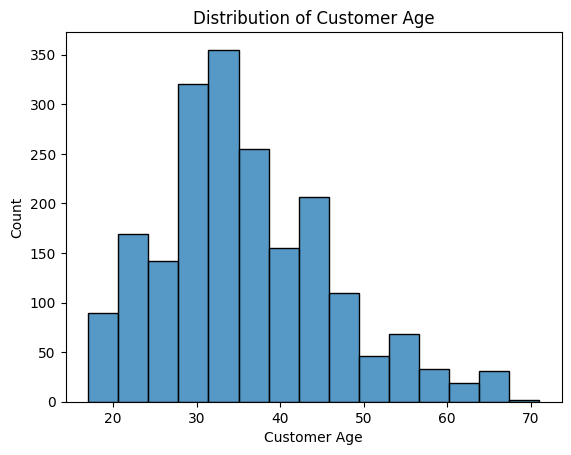

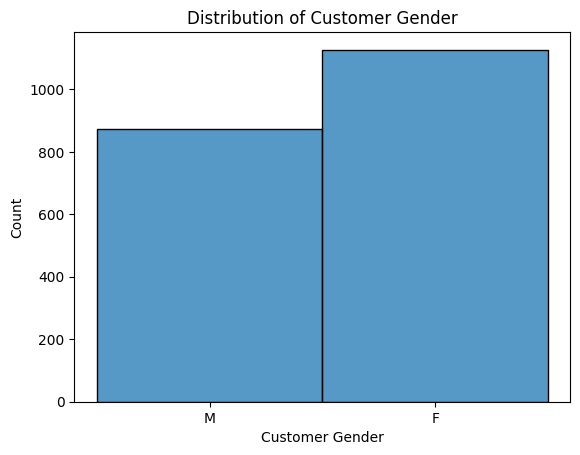

In [18]:
# Plot age distribution (Use sns.histplot)
#FILL THE CODE HERE
sns.histplot(data=df,x='Customer Age',bins=15)
# Plot 1 Details
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.show()
# plt.savefig('agedistribution.jpg')
# plt.clf()

# Gender Distribution (Use sns.histplot())
#FILL THE CODE HERE
# Plot 2 Details
sns.histplot(data=df,x='Customer Gender')
plt.title("Distribution of Customer Gender")
plt.xlabel("Customer Gender")
plt.ylabel("Count")
plt.show()
# plt.savefig('genderdistribution.jpg')
# plt.clf()


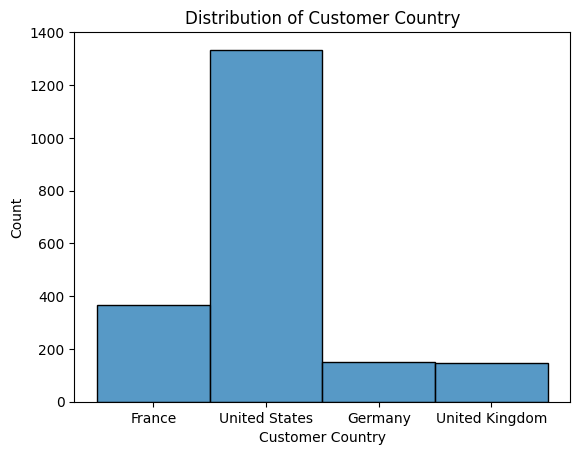

In [19]:
# # Country Distribution (Use sns.histplot())
# #FILL THE CODE HERE
sns.histplot(data=df,x='Country')
# Plot 3 Details
plt.title("Distribution of Customer Country")
plt.xlabel("Customer Country")
plt.ylabel("Count")
plt.show()

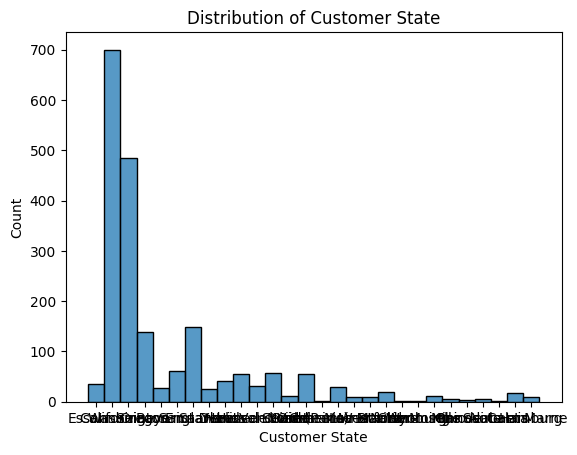

In [20]:
# State Distribution (Use sns.histplot())
#FILL THE CODE HERE
sns.histplot(data=df,x='State')
# Plot 4 Details
plt.title("Distribution of Customer State")
plt.xlabel("Customer State")
plt.ylabel("Count")
plt.show()

Age Group   Product Category
0-18        Accessories           7
            Bikes                 7
            Clothing              5
19-30       Accessories         475
            Bikes                93
            Clothing             97
31-40       Accessories         475
            Bikes               163
            Clothing            114
41-50       Accessories         245
            Bikes                78
            Clothing             44
51-60       Accessories          94
            Bikes                33
            Clothing             18
61-70       Accessories          37
            Bikes                 8
            Clothing              5
71 & above  Accessories           2
            Bikes                 0
            Clothing              0
dtype: int64
Product Category  Accessories  Bikes  Clothing
Age Group                                     
0-18                        7      7         5
19-30                     475     93        97
31-40         

C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\1304893570.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_category_age_group=df.groupby(['Age Group','Product Category'])
C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\1304893570.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_category_age_group=df.groupby(['Age Group','Product Category']).size()
C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\1304893570.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True

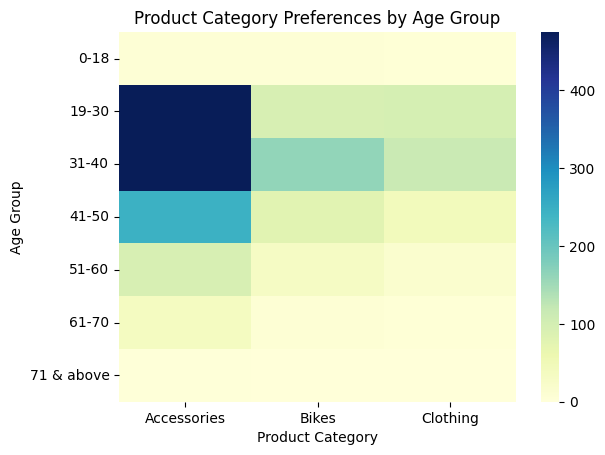

In [23]:
# Purchase Behavior Analysis
# Product Category Preferences by Age Group
# Group the DataFrame by 'Age Group' and 'Product Category'
#FILL THE CODE HERE
product_category_age_group=df.groupby(['Age Group','Product Category'])
print(product_category_age_group)
product_category_age_group=df.groupby(['Age Group','Product Category']).size()
print(product_category_age_group)
product_category_age_group=df.groupby(['Age Group','Product Category']).size().unstack()
print(product_category_age_group.head(3))
# Pivot the data for heatmap
#FILL THE CODE HERE
product_category_age_group_pivot=product_category_age_group.fillna(0)

# Create heatmap for product category preferences by age group
# Use annot=False, cmap="YlGnBu", cbar=True
#FILL THE CODE HERE
sns.heatmap(product_category_age_group_pivot,annot=False,cmap="YlGnBu",cbar=True)
# Plot 5 Details
plt.xlabel("Product Category")
plt.ylabel("Age Group")
plt.title("Product Category Preferences by Age Group")
plt.show()

Age Group   Sub Category     
0-18        Bike Racks           0
            Bike Stands          2
            Bottles and Cages    2
            Caps                 1
            Cleaners             0
                                ..
71 & above  Road Bikes           0
            Socks                0
            Tires and Tubes      0
            Touring Bikes        0
            Vests                0
Length: 112, dtype: int64
Sub Category  Bike Racks  Bike Stands  Bottles and Cages  Caps  Cleaners  \
Age Group                                                                  
0-18                   0            2                  2     1         0   
19-30                  0            5                 60    20        11   

Sub Category  Fenders  Gloves  Helmets  Hydration Packs  Jerseys  \
Age Group                                                          
0-18                0       1        2                1        3   
19-30              23       6      109            

C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\2147048937.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subcategory_age_group=df.groupby(['Age Group','Sub Category'])
C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\2147048937.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subcategory_age_group=df.groupby(['Age Group','Sub Category']).size()
C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\2147048937.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

<Figure size 1000x600 with 0 Axes>

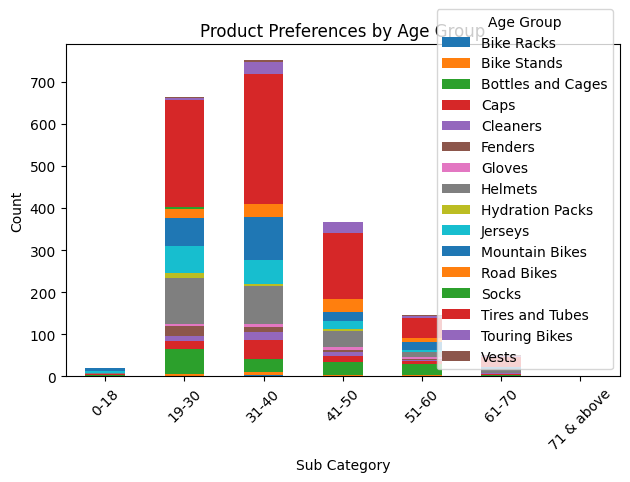

In [25]:
# Subcategory Preferences by Age Group
# Group the DataFrame by 'Age Group' and 'Sub Category'
subcategory_age_group=df.groupby(['Age Group','Sub Category'])
print(subcategory_age_group)
subcategory_age_group=df.groupby(['Age Group','Sub Category']).size()
print(subcategory_age_group)
subcategory_age_group=df.groupby(['Age Group','Sub Category']).size().unstack()
print(subcategory_age_group.head(2))
# Create bar chart for subcategory preferences by age group
plt.figure(figsize=(10, 6))
#FILL THE CODE HERE
subcategory_age_group.plot(kind='bar',stacked=True)
# Plot 6 Details
plt.title("Product Preferences by Age Group")
plt.xlabel("Sub Category")
plt.ylabel("Count")
plt.legend(title="Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_10408\2923677890.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_quantity=df.groupby('Age Group').agg({'Unit Price':'mean','Quantity':'mean'})


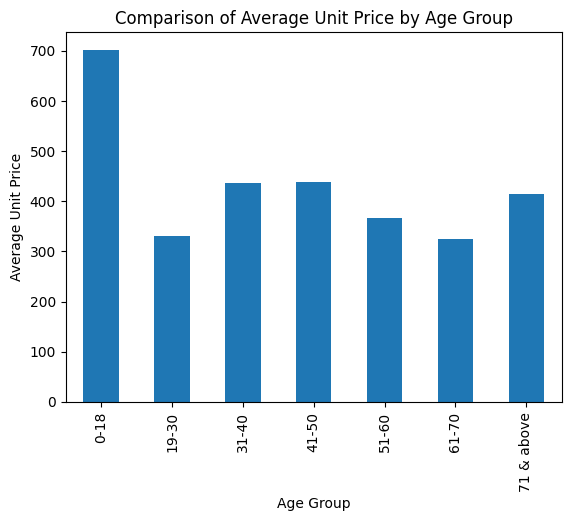

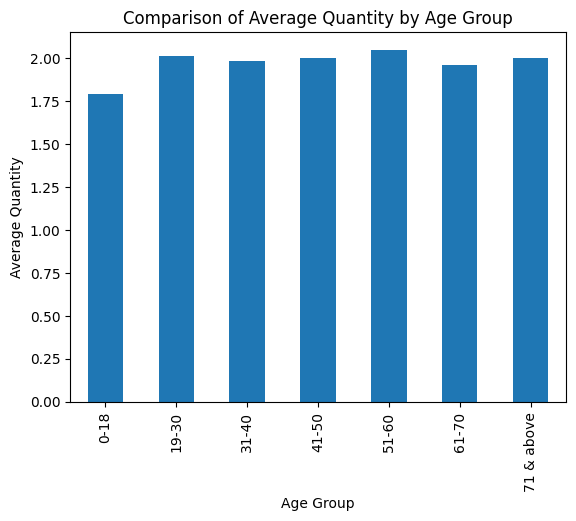

In [26]:
# Financial Metrics Analysis
# Compute the average unit price and quantity purchased by different age groups and create a dataframe
#FILL THE CODE HERE
average_price_quantity=df.groupby('Age Group').agg({'Unit Price':'mean','Quantity':'mean'})
# Create bar chart for Average Unit Price by Age Group
#FILL THE CODE HERE
average_price_quantity['Unit Price'].plot(kind='bar')
# Plot 7 Details
plt.title("Comparison of Average Unit Price by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Unit Price")
plt.show()

# Create bar chart for Average Quantity by Age Group
#FILL THE CODE HERE
average_price_quantity['Quantity'].plot(kind='bar')
# Plot 8 Details
plt.title("Comparison of Average Quantity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Quantity")
plt.show()


Customer Age
17      602
18    16538
Name: Revenue, dtype: int64


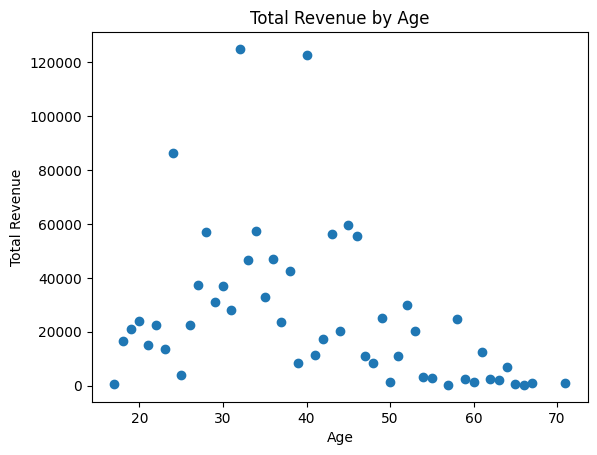

In [27]:
# Distribution of Revenue by Age
# Group total revenue by customer age
#FILL THE CODE HERE

revenue_by_age=df.groupby('Customer Age')['Revenue'].sum()
print(revenue_by_age.head(2))
# Plot a Scatter Plot - total revenue by customer age
#FILL THE CODE HERE
plt.scatter(revenue_by_age.index,revenue_by_age.values)
# Plot 9 Details
plt.xlabel('Age')
plt.ylabel("Total Revenue")
plt.title('Total Revenue by Age')
plt.show()

Product Category  Sub Category     
Accessories       Bike Racks           271.666667
                  Bike Stands          115.000000
                  Bottles and Cages     24.296053
                  Cleaners              22.840909
                  Fenders               87.512195
                  Helmets              106.346154
                  Hydration Packs      127.875000
                  Tires and Tubes       39.513308
Bikes             Mountain Bikes       -31.236607
                  Road Bikes             3.662921
                  Touring Bikes        131.318841
Clothing          Caps                  25.703297
                  Gloves               111.769231
                  Jerseys              104.731544
                  Socks                  6.166667
                  Vests                142.090909
Name: Margin, dtype: float64
  Product Category       Sub Category      Margin
0      Accessories         Bike Racks  271.666667
1      Accessories        Bike Stan

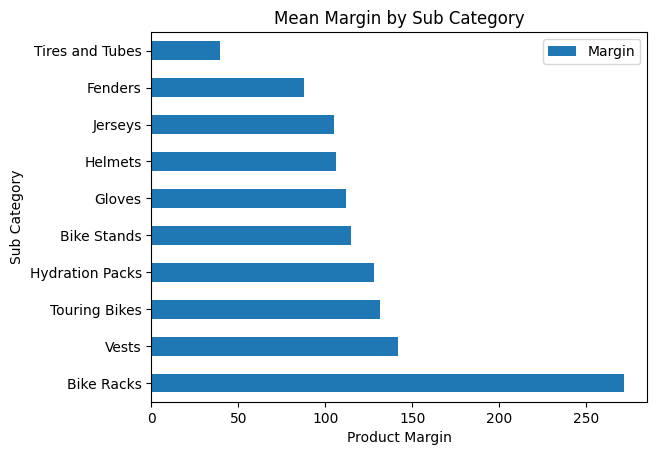

In [28]:
# Profitability Assessment

# Calculate the average margin by product category and subcategory
#FILL THE CODE HERE
avg_margin_by_subcategory=df.groupby(['Product Category','Sub Category'])['Margin'].mean()
print(avg_margin_by_subcategory)
avg_margin_by_subcategory=df.groupby(['Product Category','Sub Category'])['Margin'].mean().reset_index()
print(avg_margin_by_subcategory.head())
# Sort the DataFrame by margin and select the top 10 products
#FILL THE CODE HERE
top_10_margin=avg_margin_by_subcategory.sort_values(by='Margin',ascending=False).head(10)


# Create horizontal bar chart for mean margin by subcategory for top 10 products
#FILL THE CODE HERE
top_10_margin.plot(kind='barh',x='Sub Category',y='Margin')
# Plot 10 Details
plt.title("Mean Margin by Sub Category")
plt.xlabel("Product Margin")
plt.ylabel("Sub Category")
plt.show()

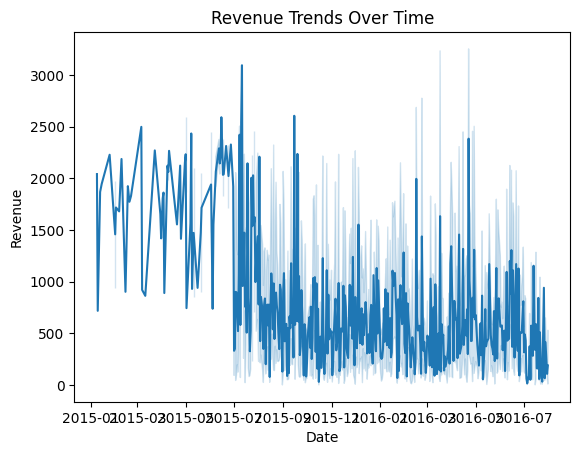

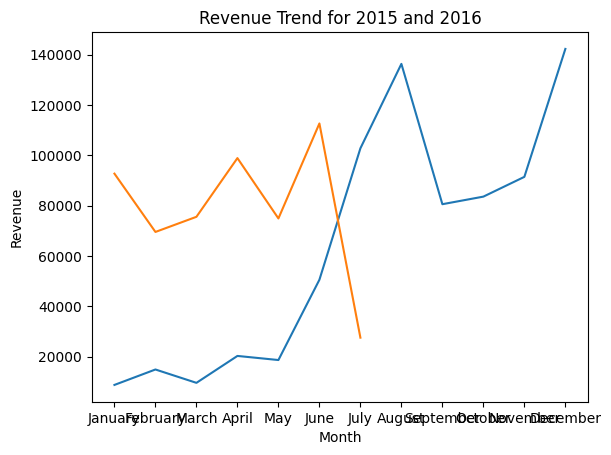

In [29]:
# Temporal Trends
# Revenue Trend
# Sort DataFrame by date
#FILL THE CODE HERE
df.sort_values(by='Date',inplace=True)

# Plot revenue trend over time. Use sns.lineplot
#FILL THE CODE HERE
sns.lineplot(data=df,x='Date',y='Revenue')
# Plot 11 Details
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue Trends Over Time")
plt.show()

# Monthly Revenue Comparison by Year
# Filter data by year
year1 = df[df["Year"] == "2015"]
year2 = df[df["Year"] == "2016"]

# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group data by month and sum revenue
monthly_rev2015 = year1.groupby('Month')['Revenue'].sum().reindex(months_order).reset_index()
monthly_rev2016 = year2.groupby('Month')['Revenue'].sum().reindex(months_order).reset_index()

# Plot 2 separate line plots to compare monthly revenue for 2015 and 2016
#FILL THE CODE HERE
plt.plot(monthly_rev2015['Month'],monthly_rev2015['Revenue'],label='2015')
plt.plot(monthly_rev2016['Month'],monthly_rev2016['Revenue'],label='2016')

# Plot 12 Details
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue Trend for 2015 and 2016")
plt.show()

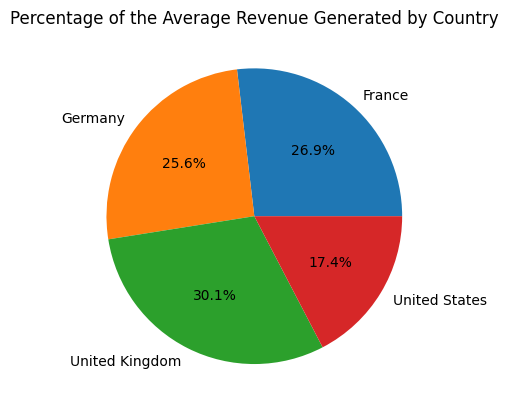

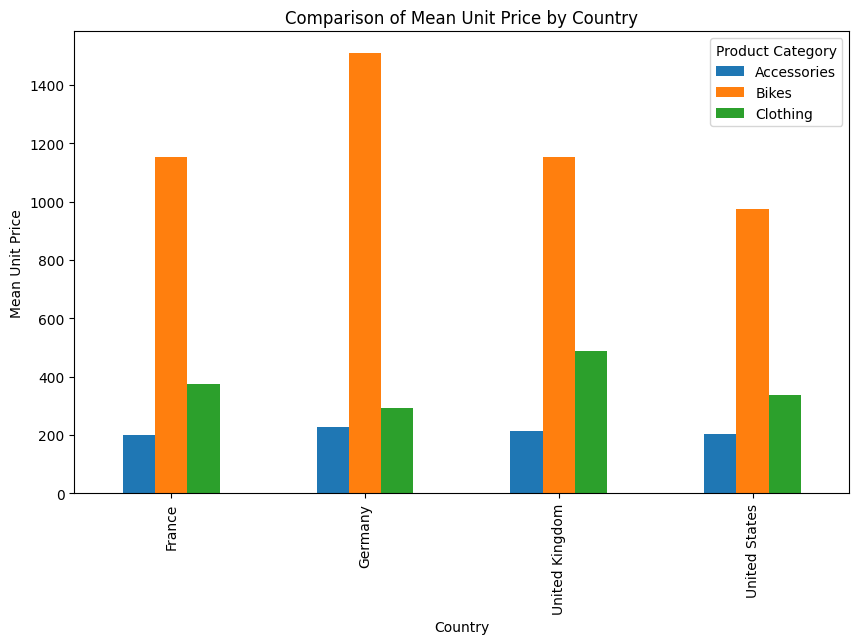

In [46]:
# Geographic Analysis

# Average Revenue generated by Country
labels = ['France', 'Germany', 'United Kingdom', 'United States']
sizes = df.groupby("Country")["Revenue"].mean()

# Create pie chart for average revenue generated by country. Set autopct='%1.1f%%'
#FILL THE CODE HERE
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
# Plot 13 Details
plt.title("Percentage of the Average Revenue Generated by Country")
plt.show()

# Average Unit Price per Product by Country
# Group data by country and product category to calculate mean unit price
#FILL THE CODE HERE
avg_unit_price_by_country=df.groupby(['Country','Product Category'])['Unit Price'].mean().unstack()
# Create bar chart for average unit price per product by country
#FILL THE CODE HERE
avg_unit_price_by_country.plot(kind='bar',figsize=(10,6))
# Plot 14 Details
plt.xlabel("Country")
plt.ylabel("Mean Unit Price")
plt.title("Comparison of Mean Unit Price by Country")
plt.show()